# 1. Install Dependencies and Setup

In [636]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda                      0.0.1.1
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backp

In [637]:
!pip install tensorflow opencv-python matplotlib
 

In [638]:
import tensorflow as tf
import os

In [639]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
#gpus = tf.config.experimental.list_physical_devices('GPU')
#for gpu in gpus: 
   # tf.config.experimental.set_memory_growth(gpu, True)

In [640]:
#tf.config.list_physical_devices('GPU')

# 2. Remove dodgy images

In [641]:
import cv2
import imghdr

In [642]:
data_dir = "/Users/saket/ImageClassification/data"

In [643]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [644]:
import os
data_dir = "/Users/saket/ImageClassification/data"
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image /Users/saket/ImageClassification/data/nodule/.ipynb_checkpoints
Issue with image /Users/saket/ImageClassification/data/normal/.ipynb_checkpoints


# 3. Load Data

In [645]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, s

In [646]:
tf.data.Dataset??
import numpy as np
from matplotlib import pyplot as plt

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dtype=int32)
  tf.Tensor(3, s

In [647]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('/Users/saket/ImageClassification/data')

Found 1102 files belonging to 2 classes.


In [648]:
data = tf.keras.utils.image_dataset_from_directory('/Users/saket/ImageClassification/data')
data_iterator = data.as_numpy_iterator()

Found 1102 files belonging to 2 classes.


In [649]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

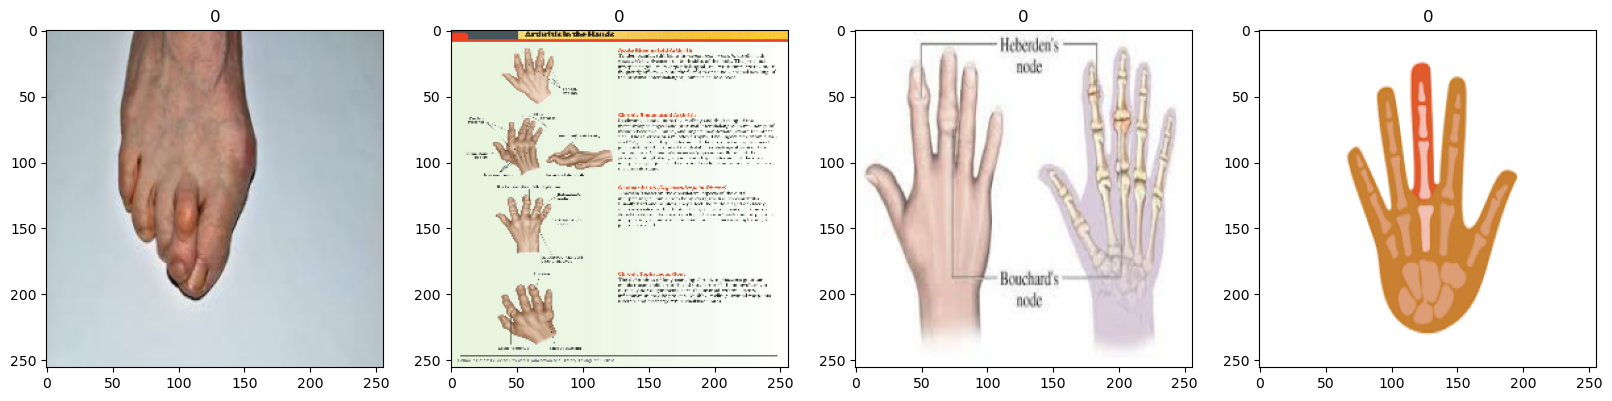

In [650]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [651]:
data = data.map(lambda x,y: (x/255, y))

In [652]:
data.as_numpy_iterator().next()

(array([[[[5.96560955e-01, 6.59443915e-01, 7.57460177e-01],
          [6.79672182e-01, 7.66567111e-01, 8.60960484e-01],
          [7.49249399e-01, 8.72311592e-01, 9.80966628e-01],
          ...,
          [8.54702815e-02, 1.43719360e-01, 1.32184431e-01],
          [1.24800861e-01, 1.87477022e-01, 1.75712317e-01],
          [1.52780324e-01, 2.15525433e-01, 2.03760728e-01]],
 
         [[5.83900750e-01, 6.36795938e-01, 7.32329845e-01],
          [6.37048721e-01, 7.14087486e-01, 8.08393180e-01],
          [6.97618425e-01, 8.17964196e-01, 9.22356904e-01],
          ...,
          [8.54702815e-02, 1.43719360e-01, 1.32184431e-01],
          [1.24800861e-01, 1.87477022e-01, 1.75712317e-01],
          [1.52780324e-01, 2.15525433e-01, 2.03760728e-01]],
 
         [[5.78124881e-01, 6.17576540e-01, 7.03985453e-01],
          [5.97094774e-01, 6.59227133e-01, 7.50388265e-01],
          [6.43722594e-01, 7.53326178e-01, 8.52192581e-01],
          ...,
          [8.39684308e-02, 1.42217502e-01, 1.3068

# 5. Split Data

In [653]:

train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [654]:
train_size+val_size+test_size

34

In [655]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)
len(test)

3

# 6. Build Deep Learning Model

In [656]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [657]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [658]:
model = Sequential()

In [659]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [660]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [661]:
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 30, 30, 16)      

# 7. Train

In [662]:
logdir='logs'

In [663]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [664]:
hist = model.fit(train, epochs= 20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
24/24 [==============================] - 39s 2s/step - loss: 0.5816 - accuracy: 0.8073 - val_loss: 0.2868 - val_accuracy: 0.8616
Epoch 2/20
24/24 [==============================] - 39s 2s/step - loss: 0.3288 - accuracy: 0.8294 - val_loss: 0.3423 - val_accuracy: 0.8348
Epoch 3/20
24/24 [==============================] - 34s 1s/step - loss: 0.3542 - accuracy: 0.8281 - val_loss: 0.3668 - val_accuracy: 0.8348
Epoch 4/20
24/24 [==============================] - 37s 1s/step - loss: 0.3200 - accuracy: 0.8620 - val_loss: 0.2774 - val_accuracy: 0.8393
Epoch 5/20
24/24 [==============================] - 36s 1s/step - loss: 0.3602 - accuracy: 0.8542 - val_loss: 0.5155 - val_accuracy: 0.8393
Epoch 6/20
24/24 [==============================] - 28s 1s/step - loss: 0.3632 - accuracy: 0.8672 - val_loss: 0.3655 - val_accuracy: 0.8571
Epoch 7/20
24/24 [==============================] - 24s 946ms/step - loss: 0.2644 - accuracy: 0.8867 - val_loss: 0.2467 - val_accuracy: 0.9330
Epoch 8/20
24/24 

# 8. Plot Performance

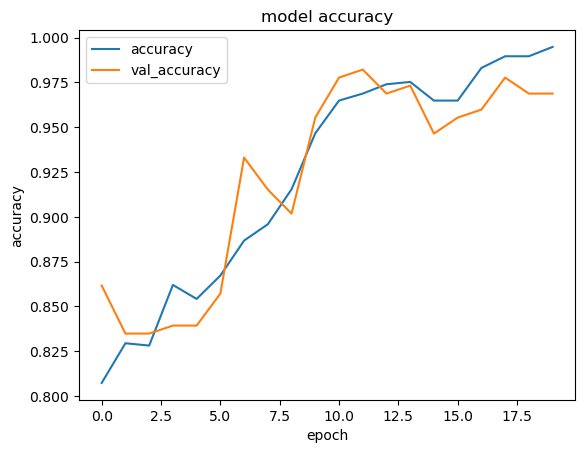

In [671]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'], loc='upper left')
plt.show()

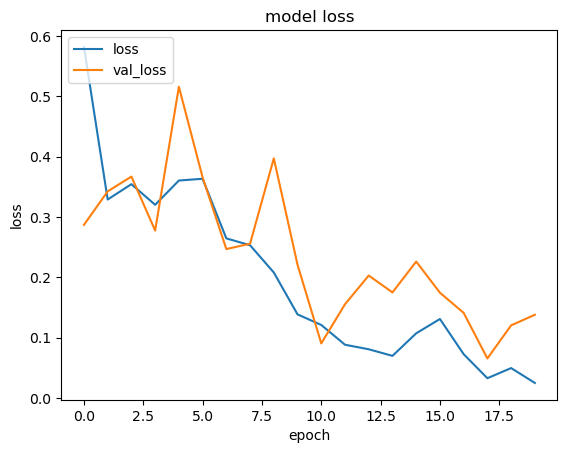

In [672]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'], loc='upper left')
plt.show()

In [673]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Epoch 1/20


KeyboardInterrupt: 

In [674]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Epoch 1/20
 5/24 [=====>........................] - ETA: 19s - loss: 0.0755 - accuracy: 0.9875

KeyboardInterrupt: 

# 9. Evaluate

In [675]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [676]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [677]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    result = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 254ms/step


In [678]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.21212122, shape=(), dtype=float32) tf.Tensor(0.46666667, shape=(), dtype=float32) tf.Tensor(0.6458333, shape=(), dtype=float32)


# 10. Test

In [78]:
import cv2

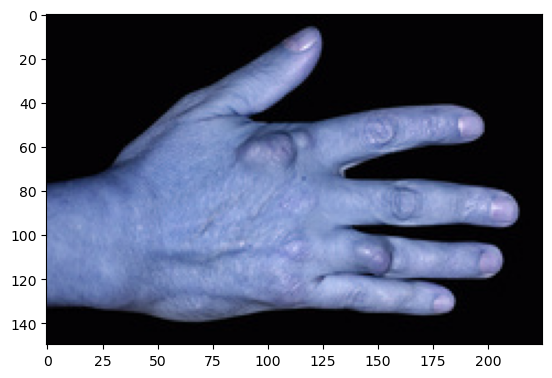

In [102]:
import cv2

img = cv2.imread('225.jpeg')
plt.imshow(img)
plt.show()

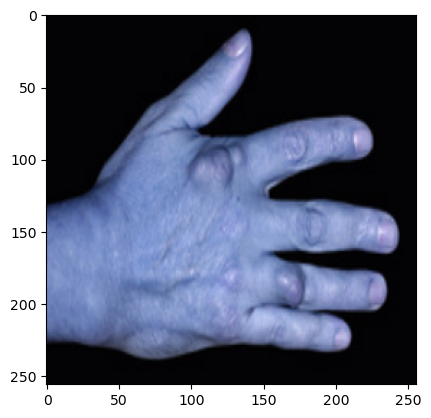

In [103]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [108]:
resize = tf.image.resize(img, (256,256))
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [109]:
yhat

array([[[[0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628],
         ...,
         [0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628]],

        [[0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628],
         ...,
         [0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628]],

        [[0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628],
         ...,
         [0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628]],

        ...,

        [[0.01176471, 0.00784314, 0.01568628],
         [0.01176471, 0.00784314, 0.01568628]

In [110]:
#yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat >0.001 : 
    print(f'Image is a normal hand. This person does not have RA.')
else:
    print(f'Image is a nodule hand. This person has RA. ')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# 11. Save the Model

In [8]:
#from tensorflow.keras.models import load_model

In [761]:
#model.save(os.path.join('models','imageclassifier.h5'))

In [734]:
#new_model = load_model('imageclassifier.h5')

In [ ]:
#new_model.predict(np.expand_dims(resize/255, 0))